# Homework 02: Naïve Bayes’ Classifier
## Kerem Girenes
### March 21, 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

def safelog(x):
    return(np.log(x + 1e-100))

## Import Data

In [2]:
images = np.genfromtxt('hw02_data_set_images.csv',delimiter=',').reshape(5, 39, 320)
labels = np.char.strip(np.genfromtxt('hw02_data_set_labels.csv',delimiter=',',dtype=str),'"').reshape(5, 39).astype(int)

print(images.shape,"\n")
print(labels.shape,"\n")

(5, 39, 320) 

(5, 39) 



## Create Training and Test Sets

In [3]:
x_train = images[:,:25,:].reshape(125, 320)  #training set images
y_train = labels[:,:25].reshape(125,)  #training set labels

x_test = images[:,25:,:].reshape(70, 320)  #test set images
y_test = labels[:,25:].reshape(70,)  #test set labels

# class size
K = np.amax(y_train)

# character size
C = x_train.shape[1]

# training set size
N_train = y_train.shape[0]

# test set size
N_test = y_test.shape[0]

print(y_train.shape)
print(x_train.shape)

print(N_train)

print(x_train)

(125,)
(125, 320)
125
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Parameter Estimation

In [4]:
pcd = [[0 for c in range(C)] for k in range(K)]
priors = []

for k in range(K):
    for c in range(C):
        pixel_total = 0
        for n in range(int(k*(N_train/K)), int((k+1)*(N_train/K))):
            pixel_total += x_train[n][c]
        pcd[k][c] = pixel_total / (N_train/K)
        
pcd = np.array(pcd)

print(pcd)

priors = np.array([np.mean(y_train == (c + 1)) for c in range(K)])

print(priors)

[[0.   0.   0.   ... 0.68 0.68 0.64]
 [0.04 0.24 0.24 ... 0.8  0.56 0.24]
 [0.   0.   0.   ... 0.6  0.88 0.8 ]
 [0.12 0.44 0.4  ... 0.28 0.16 0.08]
 [0.   0.12 0.12 ... 0.32 0.48 0.44]]
[0.2 0.2 0.2 0.2 0.2]


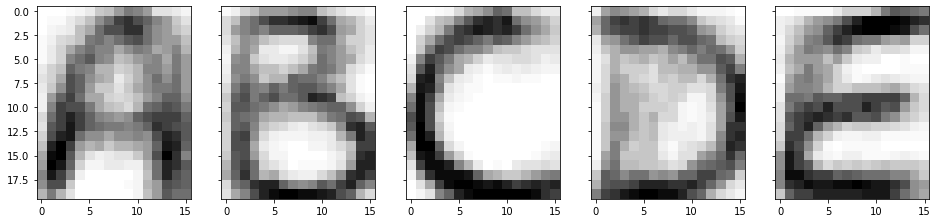

In [5]:
fig, axs = plt.subplots(1,5,figsize=(16, 20), sharey=True)
for i in range(K):
    axs[i].imshow(pcd[i].reshape(16,20).T, cmap="Greys",interpolation='none')
plt.show()

## Score Function

In [6]:
def g(k, x, n):
    val = 0
    for c in range(C):
        val += np.dot(x[n][c], safelog(pcd[k][c].T)) + np.dot((1-x[n][c]), safelog(1-pcd[k][c].T))
    val += safelog(priors[k])
    return val

## Training Set Scores

In [7]:
scores_train = []
for n in range(N_train):
    score = np.argmax([g(k, x_train, n) for k in range(K)]) + 1
    scores_train.append(score)
    
scores_train = np.array(scores_train)

train_confusion_matrix = pd.crosstab(scores_train, y_train, 
                                     rownames = ["y_pred"], 
                                     colnames = ["y_truth"])
print(train_confusion_matrix)

y_truth   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  24   1   0   1
3         0   0  24   0   0
4         0   1   0  25   0
5         0   0   0   0  24


## Test Set Scores

In [8]:
scores_test = []
for n in range(N_test):
    score = np.argmax([g(k, x_test, n) for k in range(K)]) + 1
    scores_test.append(score)
    
scores_test = np.array(scores_test)

test_confusion_matrix = pd.crosstab(scores_test, y_test, 
                                    rownames = ["y_pred"], 
                                    colnames = ["y_truth"])

print(test_confusion_matrix)

y_truth  1   2  3   4   5
y_pred                   
1        7   0  0   0   0
2        0  11  3   2   4
3        0   0  7   0   0
4        7   3  3  12   0
5        0   0  1   0  10
